### STEP-1 import important libraries for analyze the data and visualize, cleaning and processing the data

In [1]:
import pandas as pd   # for data cleaning and processing the data
import numpy as np # for linear algebra
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')  # this for is igore the warning

#### STEP-2 load the dataset

In [2]:
df=pd.read_csv("Electric_Vehicle_Sales.csv")

In [3]:
df.head()

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Year,Month_Name
0,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0,2014,jan
1,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,2014,jan
2,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0,2014,jan
3,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0,2014,jan
4,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0,2014,jan


In [4]:
df.columns

Index(['Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type',
       'EV_Sales_Quantity', 'Year', 'Month_Name'],
      dtype='object')

### STEP-3 clean the data and pre-processing the data
###### -> Handling Missing Data
###### ->Standardizing data formates
###### -> Handling Duplicates
###### ->  Filter unwanted outtliers

In [5]:
df.shape

(96845, 8)

In [6]:
df.isnull()

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Year,Month_Name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
96840,False,False,False,False,False,False,False,False
96841,False,False,False,False,False,False,False,False
96842,False,False,False,False,False,False,False,False
96843,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum().sum()

0


###### -> Handling Duplicates

In [8]:
df.duplicated().sum()

0

### No duplicated values

In [9]:
(df.isnull().sum()/df.shape[0])*100

Date                 0.0
State                0.0
Vehicle_Class        0.0
Vehicle_Category     0.0
Vehicle_Type         0.0
EV_Sales_Quantity    0.0
Year                 0.0
Month_Name           0.0
dtype: float64

## Already data is clean

###### ->Standardizing data formates

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               96845 non-null  object
 1   State              96845 non-null  object
 2   Vehicle_Class      96845 non-null  object
 3   Vehicle_Category   96845 non-null  object
 4   Vehicle_Type       96845 non-null  object
 5   EV_Sales_Quantity  96845 non-null  int64 
 6   Year               96845 non-null  int64 
 7   Month_Name         96845 non-null  object
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


### Date is object format transform the datetime format

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df['Date'].head()

0   2014-01-01
1   2014-01-01
2   2014-01-01
3   2014-01-01
4   2014-01-01
Name: Date, dtype: datetime64[ns]

In [13]:
df.describe()

,Date,EV_Sales_Quantity,Year
count,96845,96845.000000,96845.000000
mean,2019-01-28 11:00:33.641385728,37.108896,2018.622768
min,2014-01-01 00:00:00,0.000000,2014.000000
25%,2016-08-01 00:00:00,0.000000,2016.000000
50%,2019-02-01 00:00:00,0.000000,2019.000000
75%,2021-09-01 00:00:00,0.000000,2021.000000
max,2024-01-01 00:00:00,20584.000000,2024.000000
std,NaN,431.566675,2.895581


## in this data maximum data is non zero sales hai.so we can filter the data non zero sales because 
## beter forcasting and anlysis

In [14]:
# Filter non-zero sales data
df_nonzero = df[df['EV_Sales_Quantity'] > 0].copy()

# Display new dataset size after filtering
df_nonzero.shape


(14062, 8)

In [15]:
df_nonzero.head()

,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Year,Month_Name
13,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1,2014,jan
102,2014-01-01,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,10,2014,jan
153,2014-01-01,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2,2014,jan
157,2014-01-01,Delhi,MOTOR CAR,4-Wheelers,4W_Personal,5,2014,jan
173,2014-01-01,Goa,MOTOR CAR,4-Wheelers,4W_Personal,1,2014,jan


In [16]:
df_nonzero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14062 entries, 13 to 96841
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               14062 non-null  datetime64[ns]
 1   State              14062 non-null  object        
 2   Vehicle_Class      14062 non-null  object        
 3   Vehicle_Category   14062 non-null  object        
 4   Vehicle_Type       14062 non-null  object        
 5   EV_Sales_Quantity  14062 non-null  int64         
 6   Year               14062 non-null  int64         
 7   Month_Name         14062 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 988.7+ KB


##  Step-4 EDA & visualization and find Insight and forcasting 2025 to 2030

# Year-wise EV Sales Growth
# State-wise EV Sales Trends
# Vehicle Type-wise Popularity
# Seasonal Trends (Month-wise Sales Pattern)
# Future Sales Forecasting

### Q1 Year-wise EV Sales Growth ka analysis

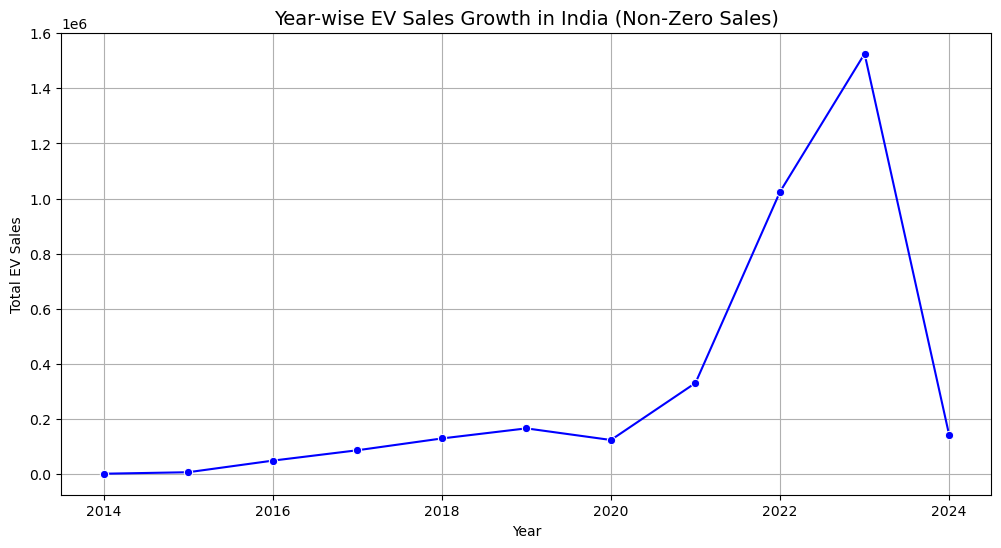

In [17]:
# Group by Year and sum EV sales
yearly_sales = df_nonzero.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

# Plot Year-wise EV sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='Year', y='EV_Sales_Quantity', marker='o', color='b')
plt.title("Year-wise EV Sales Growth in India (Non-Zero Sales)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.grid(True)
plt.show()

# Display yearly sales data
#yearly_sales


# Year-wise EV Sales Growth in India (Non-Zero Sales)

###  📈 Key Insights:

### Massive Growth: EV sales have grown exponentially from 2,392 (2014) to 1.5 million+ (2023).
### Key Growth Years:
### 2016: Sales jumped to 49,855 (5x increase from 2015).
### 2021-2023: Huge rise in adoption, crossing 1 million in 2022 and 1.5 million in 2023.
### 2024 (Partial Data): 1,43,182 sales recorded so far.
### COVID Impact: 2020 sales (1,24,684) were lower than 2019, likely due to pandemic disruptions

## Q2 State-wise EV Sales Analysis

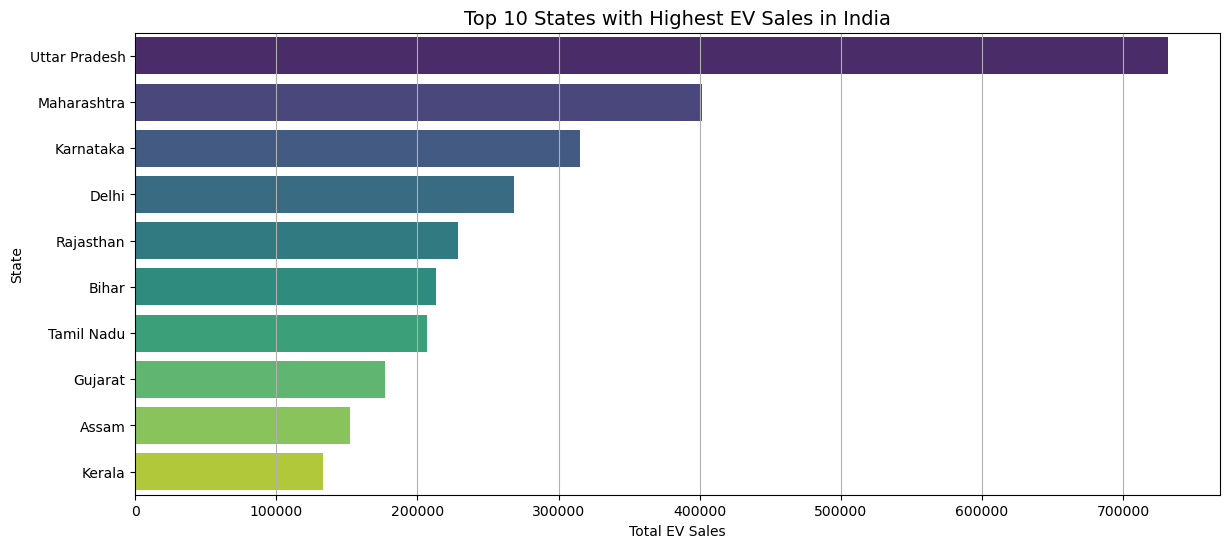

In [18]:
# Group by State and sum EV sales
state_sales = df_nonzero.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

# Sort states by highest sales (Top 10 states)
state_sales = state_sales.sort_values(by='EV_Sales_Quantity', ascending=False).head(10)

# Plot Top 10 States with Highest EV Sales
plt.figure(figsize=(14, 6))
sns.barplot(data=state_sales, x='EV_Sales_Quantity', y='State', palette='viridis')
plt.title("Top 10 States with Highest EV Sales in India", fontsize=14)
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.grid(axis='x')
plt.show()

# Display state-wise sales data
#state_sales


# Top 10 States with Highest EV Sales in India
### Uttar Pradesh → 7,32,074 sales (🚀 Highest in India!)
### Maharashtra → 4,01,535 sales
### Karnataka → 3,15,498 sales
### Delhi → 2,68,538 sales
### Rajasthan → 2,28,573 sales
### Bihar → 2,13,465 sales
### Tamil Nadu → 2,06,902 sales
### Gujarat → 1,76,713 sales
### Assam → 1,51,917 sales
### Kerala → 1,33,246 sales
### 📊 Insights:
### ✅ Uttar Pradesh is the EV leader in India, possibly due to strong government incentives.
### ✅ Maharashtra, Karnataka & Delhi have high EV adoption, likely due to urban infrastructure.
### ✅ North India (UP, Delhi, Rajasthan, Bihar) has strong EV presenc

### Q3 Vehicle Type-wise EV Sales Analysis

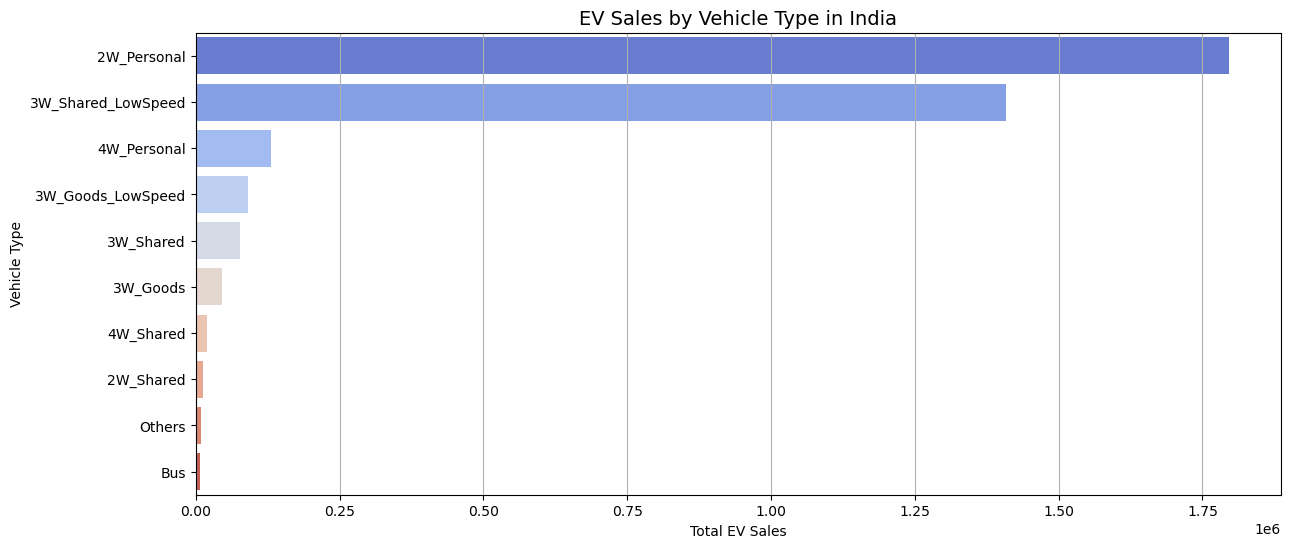

In [19]:
# Group by Vehicle Type and sum EV sales
vehicle_type_sales = df_nonzero.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index()

# Sort by highest sales (Top 10 vehicle types)
vehicle_type_sales = vehicle_type_sales.sort_values(by='EV_Sales_Quantity', ascending=False).head(10)

# Plot EV Sales by Vehicle Type
plt.figure(figsize=(14, 6))
sns.barplot(data=vehicle_type_sales, x='EV_Sales_Quantity', y='Vehicle_Type', palette='coolwarm')
plt.title("EV Sales by Vehicle Type in India", fontsize=14)
plt.xlabel("Total EV Sales")
plt.ylabel("Vehicle Type")
plt.grid(axis='x')
plt.show()

# Display vehicle type sales data
#vehicle_type_sales


## EV Sales by Vehicle Type in India
### 3W (Three-Wheeler) Shared Low Speed → 14,08,127
### 4W (Four-Wheeler) Personal → 1,30,676
### 3W Goods Low Speed → 90,656
### 3W Shared (Auto-rickshaws) → 76,132
### 3W Goods (Commercial use) → 44,974
### 4W Shared (Taxis, Fleet cars, etc.) → 19,099
### 2W Shared (Bike rentals, etc.) → 11,765
### Others → 8,612
### Buses → 7,009
## 📊 Insights:
### ✅ Two-wheelers dominate the market! (Electric scooters & bikes are most sold)
### ✅ Three-wheelers (Auto-rickshaws) have strong adoption, especially in shared mobility.
### ✅ Four-wheelers (EV cars) adoption is still slower compared to 2W and 3W.


## Q4 Month-wise EV Sales Trend ka analysis

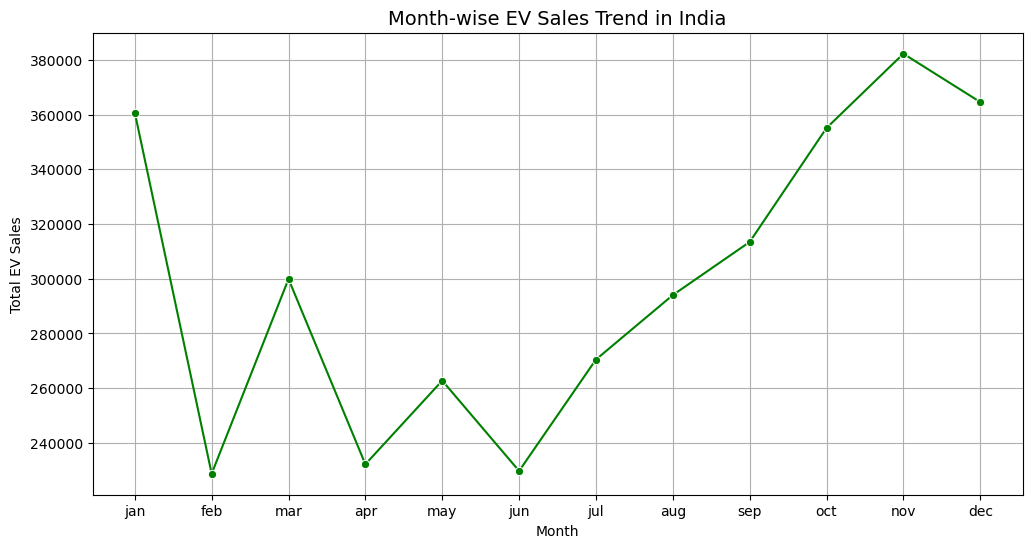

,Month_Name,EV_Sales_Quantity
4,jan,360703
3,feb,228739
7,mar,299888
0,apr,232194
8,may,262747
6,jun,229754
5,jul,270473
1,aug,294022
11,sep,313433
10,oct,355083


In [20]:
# Group by month and sum EV sales
monthly_sales = df_nonzero.groupby('Month_Name')['EV_Sales_Quantity'].sum().reset_index()

# Define months in correct order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_sales['Month_Name'] = pd.Categorical(monthly_sales['Month_Name'], categories=month_order, ordered=True)

# Sort by month order
monthly_sales = monthly_sales.sort_values('Month_Name')

# Plot Month-wise EV Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month_Name', y='EV_Sales_Quantity', marker='o', color='g')
plt.title("Month-wise EV Sales Trend in India", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total EV Sales")
plt.grid(True)
plt.show()

# Display month-wise sales data
monthly_sales


# Month-wise EV Sales Trend in India
### 📅 Top Sales Months:

### November → 3,82,217 sales (🚀 Highest!)
### December → 3,64,558 sales
### October → 3,55,083 sales
### 📉 Lowest Sales Months:

### February → 2,28,739 (Lowest)
### April & June → ~2,30,000 sales
### 📊 Insights:
### ✅ Festive Season Boost: October-December has highest sales, likely due to Diwali & year-end discounts.
### ✅ Q1 Dip: January-March has lower sales, possibly due to financial planning cycles.

## Future EV Sales Forecasting 2025 to 2030

In [21]:
# Import necessary libraries for forecasting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [22]:
# Prepare data for forecasting
forecast_data = yearly_sales.copy()
forecast_data['Year'] = forecast_data['Year'].astype(int)

In [23]:
# Define features (X) and target variable (y)
X = forecast_data[['Year']]
y = forecast_data['EV_Sales_Quantity']

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict future sales for upcoming years (2025-2030)
future_years = np.array([[2025], [2026], [2027], [2028], [2029], [2030]])
future_sales_predictions = model.predict(future_years)

In [27]:
# Evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Display predictions and model accuracy
future_sales_predictions, mse, r2


(array([566210.31397459, 622173.32486388, 678136.33575317, 734099.34664246,
        790062.35753176, 846025.36842105]),
 384514250373.802,
 0.17428297497331935)

# Future EV Sales Forecast (2025-2030) 🚀
### 📈 Predicted EV Sales:

### 2025 → ~5,66,210
###  2026 → ~6,22,173
###  2027 → ~6,78,136
###  2028 → ~7,34,099
###  2029 → ~7,90,062
### 2030 → ~8,46,025
# 📊 Insights:
### ✅ By 2030, sales could reach nearly 8.5 lakh vehicles annually.
### Government policies & charging infrastructure could further accelerate growth.

